# square_crop

### Load original image

In [71]:
im.max()

255

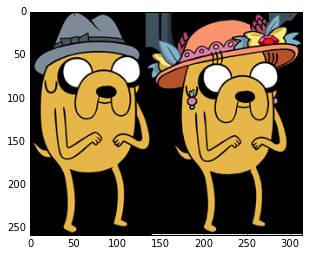

In [69]:
im = cv2.imread('jake.png')
rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [10]:
rgb.shape

(258, 314, 3)

### Hard crop

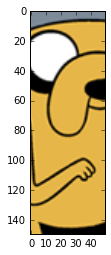

In [24]:
plt.imshow(rgb[40:190,40:90])

### Square crop (no reshape)

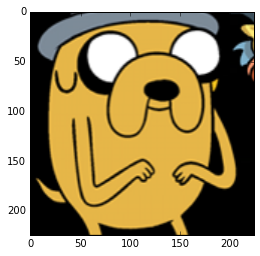

In [21]:
crop = utils.square_crop(rgb, 224, 40, 40, 50, 150)
plt.imshow(crop)

### Hard crop

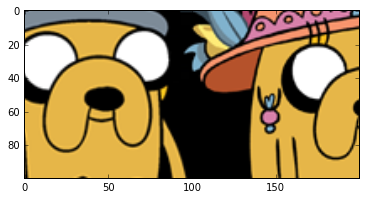

In [27]:
plt.imshow(rgb[40:140,40:240])

### Square crop (no reshape)

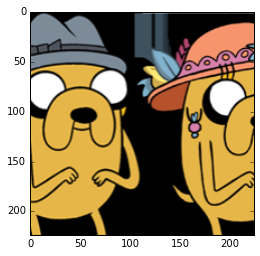

In [28]:
crop = utils.square_crop(rgb, 224, 40, 40, 200, 100)
plt.imshow(crop)

# Data loading

In [1]:
import cv2
import matplotlib.pyplot as plt
import utils

%matplotlib inline

In [2]:
import sys
pth = '/Users/eric/skool/thesis/data/vrd/'

init_path = '/Users/eric/code/tensorflow-vgg'

In [3]:
# which_net = 'objnet'
# output_size = 100
which_net = 'relnet'
output_size = 70

batch_size = 10
meta_epochs = 100

obj_list  = pth + 'objectListN.mat'
rel_list  = pth + 'predicate.mat'
train_mat = pth + 'annotation_train.mat'
test_mat  = pth + 'annotation_test.mat'

img_dir   = pth + 'sg_dataset/sg_test_images/'
mean_file = '/Users/eric/code/detect-relationships/mean.npy'

data_batcher = utils.load_data_batcher(test_mat, obj_list, rel_list, 
                                       batch_size, meta_epochs, 
                                       which_net, img_dir, mean_file)

    

In [4]:
meta_batch = data_batcher.next()

In [5]:
len(meta_batch)

8

In [6]:
obj2idx = {r:i for i,r in enumerate(utils.loadmat(obj_list)['objectListN'])}
idx2obj = {i:r for i,r in enumerate(utils.loadmat(obj_list)['objectListN'])}
rel2idx = {r:i for i,r in enumerate(utils.loadmat(rel_list)['predicate'])}
idx2rel = {i:r for i,r in enumerate(utils.loadmat(rel_list)['predicate'])}

In [47]:
images = meta_batch[0][0]
labels = meta_batch[0][1]
print images.shape
print labels.shape
print labels.argmax(axis=1)

word_labels = [idx2obj[i] for i in labels.argmax(axis=1)]
print word_labels

(10, 224, 224, 3)
(10, 100)
[ 0  6  0 95  0 58  0 15  0 15]
[u'person', u'shirt', u'person', u'watch', u'person', u'shorts', u'person', u'grass', u'person', u'grass']


In [58]:
bgr2rgb = lambda bgr_img: cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

VGG_MEAN = [103.939, 116.779, 123.68]

In [68]:
new_img = (images[0,:,:,:] + VGG_MEAN)

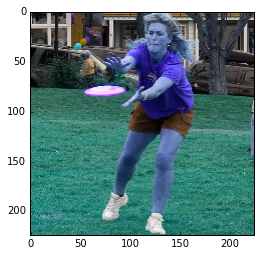

In [64]:
plt.imshow(new_img)

In [8]:
images = meta_batch[0][0]
labels = meta_batch[0][1]
print images.shape
print labels.shape
print labels.argmax(axis=1)

word_labels = [idx2rel[i] for i in labels.argmax(axis=1)]
print word_labels

(10, 224, 224, 3)
(10, 70)
[ 1  1  1  0 38 14 14  3  1 10]
[u'wear', u'wear', u'wear', u'on', u'stand on', u'in the front of', u'in the front of', u'next to', u'wear', u'behind']


In [14]:
bgr2rgb = lambda bgr_img: cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

VGG_MEAN = [103.939, 106.779, 103.68]

In [21]:
new_img = (images[-1,:,:,:]) + VGG_MEAN

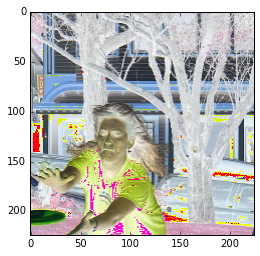

In [22]:
plt.imshow(new_img)

In [19]:
import numpy as np
VGG_MEAN = np.array([103.939, 116.779, 123.68])
np.save('mean.npy', VGG_MEAN)

In [3]:
!open .